<a href="https://colab.research.google.com/github/blackseashark5/Adobe-Gensolve/blob/main/Copy_of_frag2_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy svgwrite cairosvg ipywidgets


  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 1.6 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


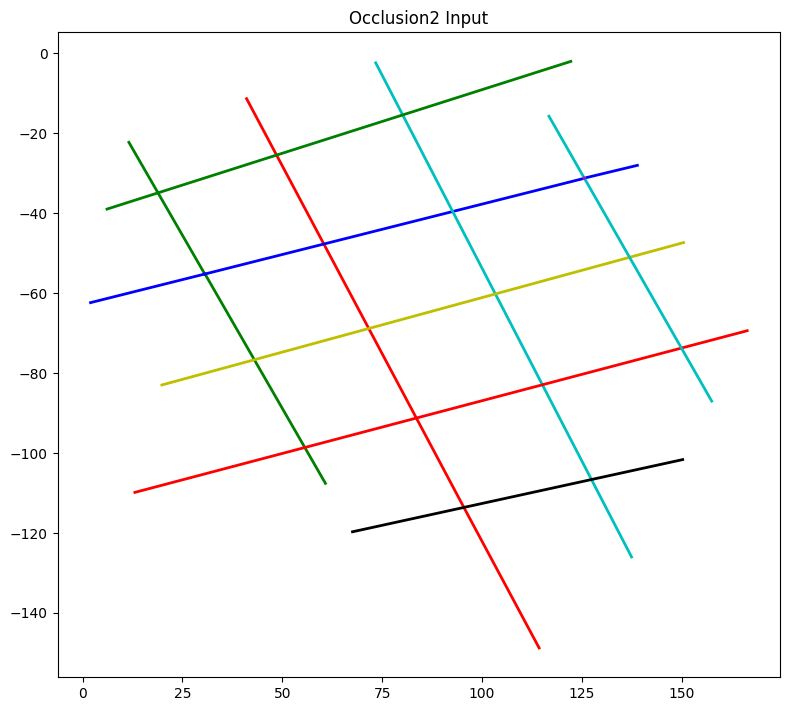

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import svgwrite
import cairosvg

def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def plot_paths(paths_XYs, title):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    colours = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], -XY[:, 1], c=c, linewidth=2)  # Invert Y-axis for correct orientation
    ax.set_aspect('equal')
    ax.set_title(title)
    plt.show()

def polylines2svg(paths_XYs, svg_path):
    W, H = 0, 0
    for path_XYs in paths_XYs:
        for XY in path_XYs:
            W, H = max(W, np.max(XY[:, 0])), max(H, np.max(XY[:, 1]))
    padding = 0.1
    W, H = int(W + padding * W), int(H + padding * H)
    dwg = svgwrite.Drawing(svg_path, profile='tiny', shape_rendering='crispEdges')
    colours = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black']

    group = dwg.g()
    for i, path in enumerate(paths_XYs):
        path_data = []
        c = colours[i % len(colours)]
        for XY in path:
            path_data.append(("M", (XY[0, 0], H - XY[0, 1])))  # Adjust Y-coordinate for correct orientation
            for j in range(1, len(XY)):
                path_data.append(("L", (XY[j, 0], H - XY[j, 1])))  # Adjust Y-coordinate for correct orientation
            if not np.allclose(XY[0], XY[-1]):
                path_data.append(("Z", None))
        group.add(dwg.path(d=path_data, fill=c, stroke='none', stroke_width=2))
    dwg.add(group)
    dwg.save()

    png_path = svg_path.replace('.svg', '.png')
    fact = max(1, 1024 // min(H, W))
    cairosvg.svg2png(url=svg_path, write_to=png_path, parent_width=W, parent_height=H, output_width=fact * W, output_height=fact * H, background_color='white')

    return

# Main function to read, plot and save SVG
def main():
    csv_path = 'frag2_sol.csv'
    svg_path = 'frag2_sol.svg'

    paths_XYs = read_csv(csv_path)
    plot_paths(paths_XYs, 'Occlusion2 Input')
    polylines2svg(paths_XYs, svg_path)

if __name__ == '__main__':
    main()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import svgwrite
import cairosvg


In [ ]:
def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def plot_paths(paths_XYs, title):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    colours = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], -XY[:, 1], c=c, linewidth=2)  # Invert Y-axis for correct orientation
    ax.set_aspect('equal')
    ax.set_title(title)
    plt.show()


In [ ]:
def polylines2svg(paths_XYs, svg_path):
    W, H = 0, 0
    for path_XYs in paths_XYs:
        for XY in path_XYs:
            W, H = max(W, np.max(XY[:, 0])), max(H, np.max(XY[:, 1]))
    padding = 0.1
    W, H = int(W + padding * W), int(H + padding * H)
    dwg = svgwrite.Drawing(svg_path, profile='tiny', shape_rendering='crispEdges')
    colours = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black']

    group = dwg.g()
    for i, path in enumerate(paths_XYs):
        path_data = []
        c = colours[i % len(colours)]
        for XY in path:
            path_data.append(("M", (XY[0, 0], H - XY[0, 1])))  # Adjust Y-coordinate for correct orientation
            for j in range(1, len(XY)):
                path_data.append(("L", (XY[j, 0], H - XY[j, 1])))  # Adjust Y-coordinate for correct orientation
            if not np.allclose(XY[0], XY[-1]):
                path_data.append(("Z", None))
        group.add(dwg.path(d=path_data, fill=c, stroke='none', stroke_width=2))
    dwg.add(group)
    dwg.save()

    png_path = svg_path.replace('.svg', '.png')
    fact = max(1, 1024 // min(H, W))
    cairosvg.svg2png(url=svg_path, write_to=png_path, parent_width=W, parent_height=H, output_width=fact * W, output_height=fact * H, background_color='white')


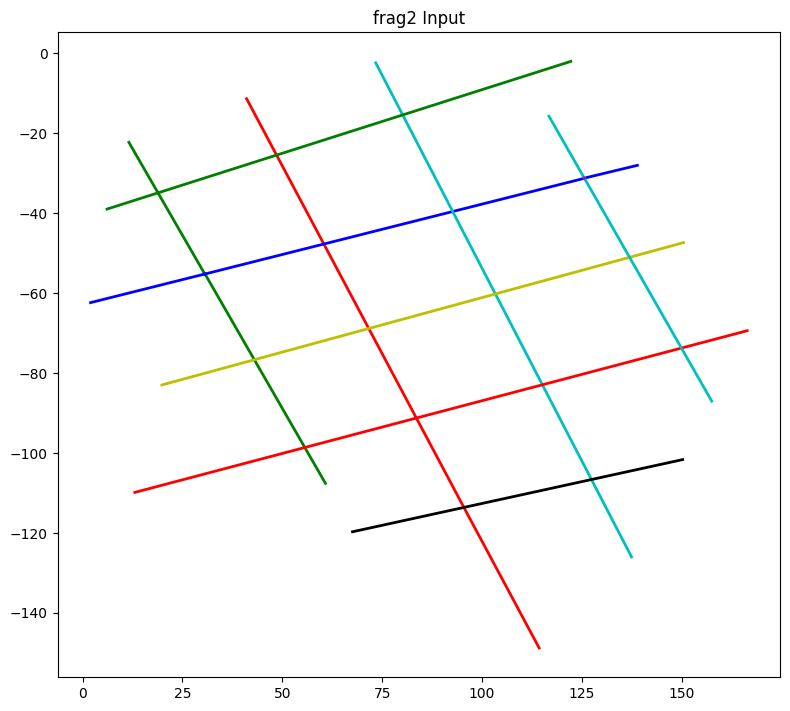

In [ ]:
def main():
    csv_path = 'frag2_sol.csv'
    svg_path = 'frag2_sol.svg'

    paths_XYs = read_csv(csv_path)
    plot_paths(paths_XYs, 'frag2 Input')
    polylines2svg(paths_XYs, svg_path)

if __name__ == '__main__':
    main()


In [ ]:
def plot_individual_paths(paths_XYs):
    for idx, path_XYs in enumerate(paths_XYs):
        fig, ax = plt.subplots(figsize=(8, 8))
        colours = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
        for i, XY in enumerate(path_XYs):
            c = colours[i % len(colours)]
            ax.plot(XY[:, 0], -XY[:, 1], c=c, linewidth=2)  # Invert Y-axis for correct orientation
        ax.set_aspect('equal')
        ax.set_title(f'Path {idx + 1}')
        plt.show()


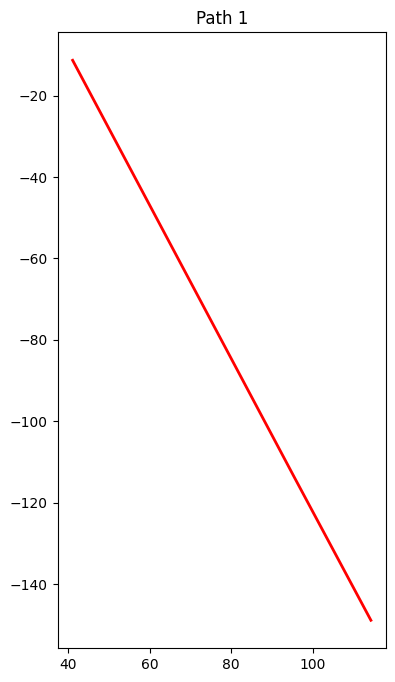

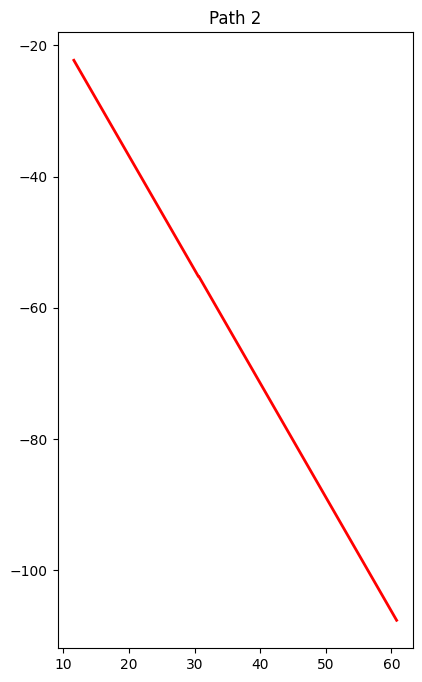

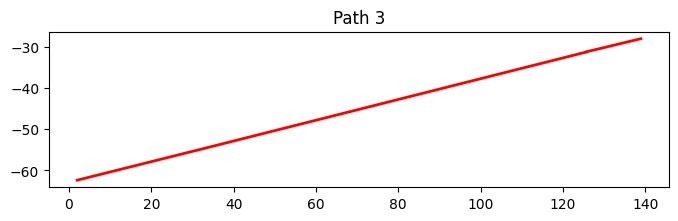

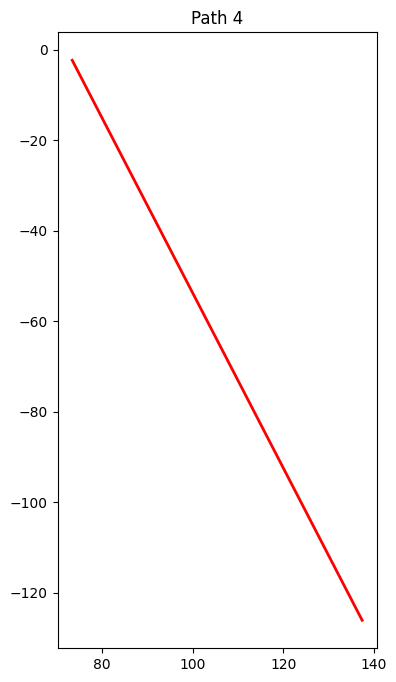

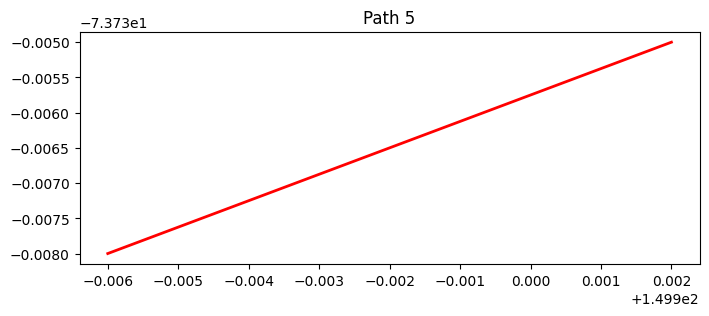

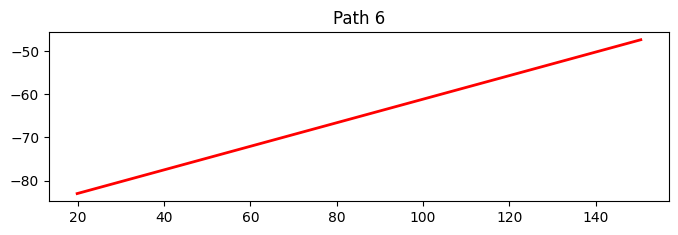

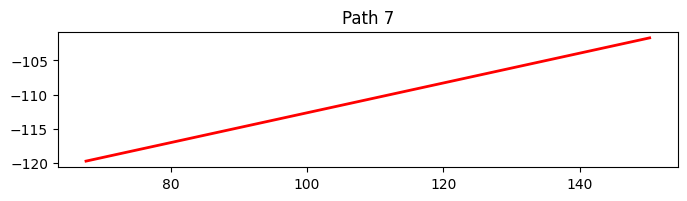

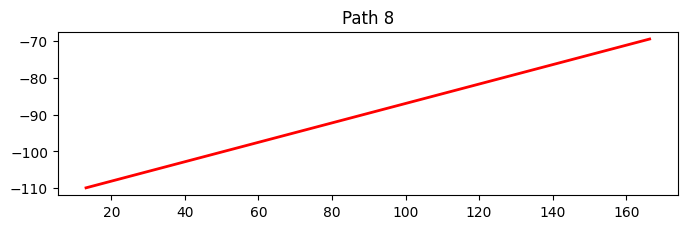

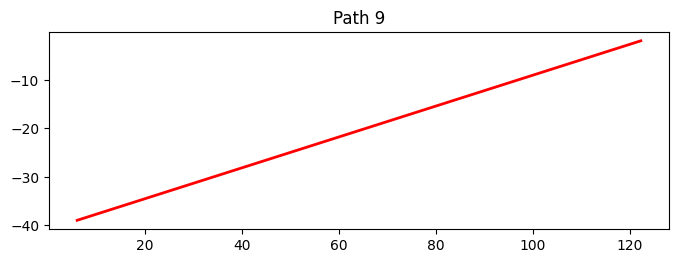

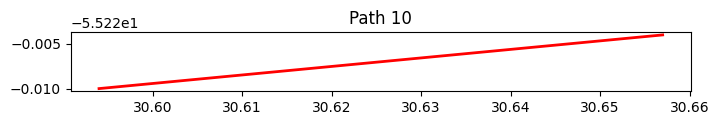

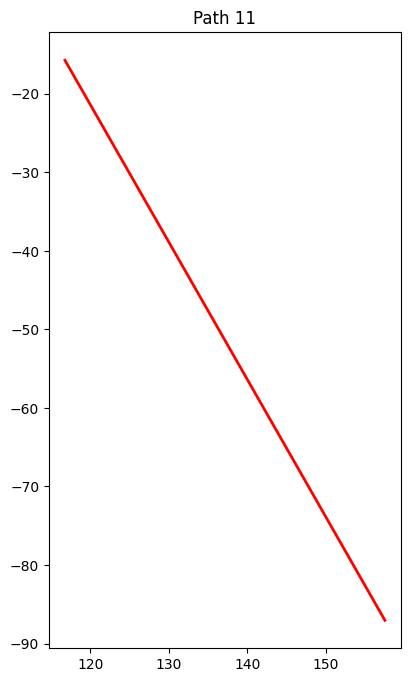

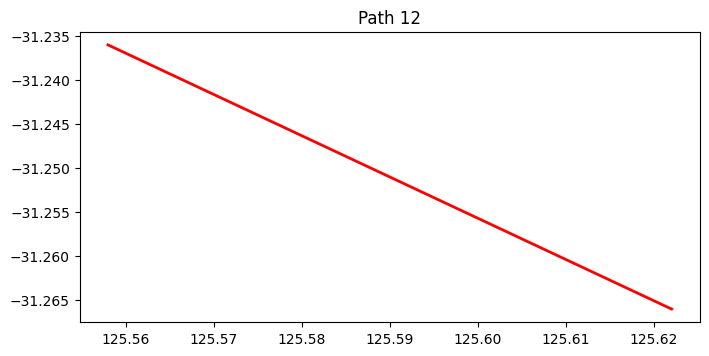

In [ ]:
csv_path = 'frag2_sol.csv'  # Replace with your CSV file path
paths_XYs = read_csv(csv_path)
plot_individual_paths(paths_XYs)


In [ ]:
def regularize_curves(paths_XYs):
    regular_shapes = []
    for path_XYs in paths_XYs:
        for XY in path_XYs:
            if len(XY) < 5:  # Skip too short curves
                continue
            # Example regularization: Keep only line or circle
            if is_line(XY) or is_circle(XY):
                regular_shapes.append(XY)
    return regular_shapes

def is_line(XY):
    # Placeholder for line detection logic
    return len(XY) == 2

def is_circle(XY):
    # Placeholder for circle detection logic
    return len(XY) == 100  # Example condition for circle


In [ ]:
def plot_shapes(shapes, title):
    fig, ax = plt.subplots(figsize=(8, 8))
    colours = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    for i, XY in enumerate(shapes):
        c = colours[i % len(colours)]
        ax.plot(XY[:, 0], -XY[:, 1], c=c, linewidth=2)  # Invert Y-axis for correct orientation
    ax.set_aspect('equal')
    ax.set_title(title)
    plt.show()


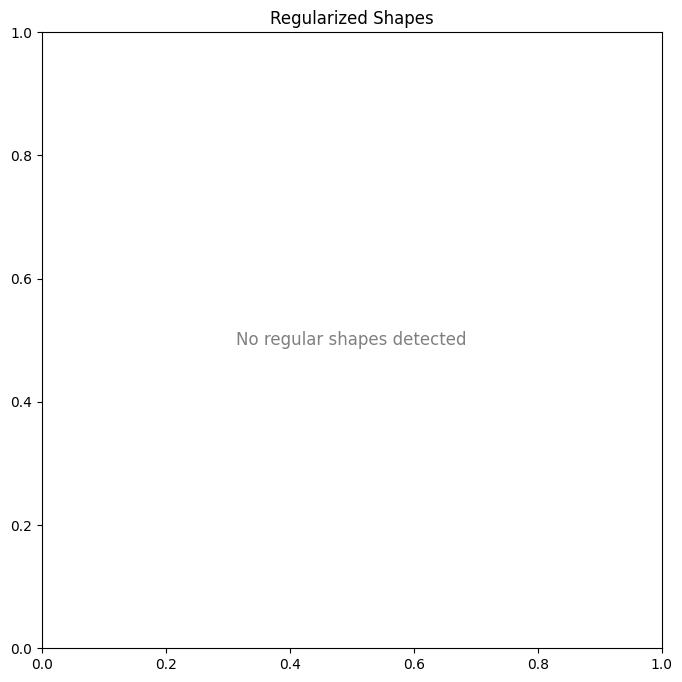

In [ ]:
csv_path = 'frag2_sol.csv'  # Replace with your CSV file path
paths_XYs = read_csv(csv_path)
regular_shapes = regularize_curves(paths_XYs)

fig, ax = plt.subplots(figsize=(8, 8))
if regular_shapes:
    plot_shapes(regular_shapes, "Regularized Shapes")
else:
    ax.text(0.5, 0.5, 'No regular shapes detected', horizontalalignment='center', verticalalignment='center', fontsize=12, color='gray')
plt.title("Regularized Shapes")
plt.show()


In [ ]:
def is_symmetric(XY):
    # Check if the shape is symmetric with respect to the y-axis or x-axis
    centroid_x = np.mean(XY[:, 0])
    mirrored_XY = XY.copy()
    mirrored_XY[:, 0] = 2 * centroid_x - mirrored_XY[:, 0]

    # Check symmetry with respect to y-axis (vertical symmetry)
    symmetric_x = np.allclose(XY[:, 1], mirrored_XY[:, 1])

    # Optionally check symmetry with respect to x-axis (horizontal symmetry)
    centroid_y = np.mean(XY[:, 1])
    mirrored_XY_y = XY.copy()
    mirrored_XY_y[:, 1] = 2 * centroid_y - mirrored_XY_y[:, 1]
    symmetric_y = np.allclose(XY[:, 0], mirrored_XY_y[:, 0])

    return symmetric_x or symmetric_y



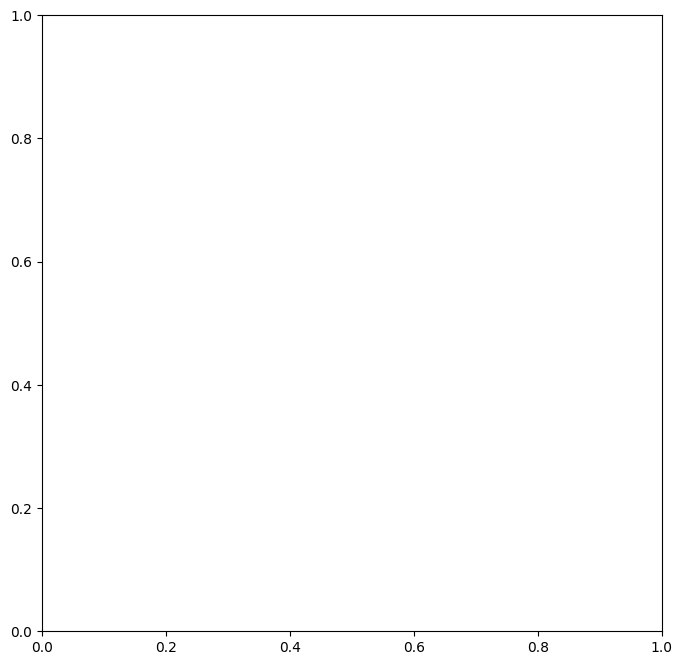

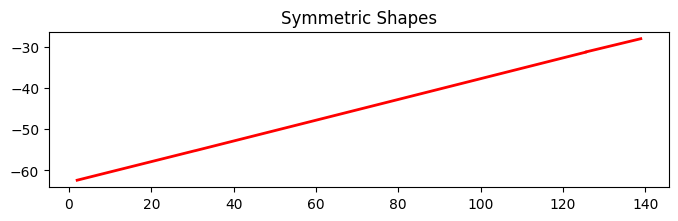

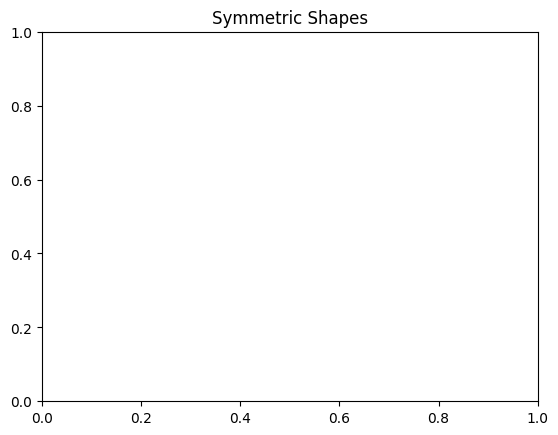

In [ ]:
csv_path = 'frag2_sol.csv'  # Replace with your CSV file path
paths_XYs = read_csv(csv_path)
symmetric_shapes = detect_symmetry(paths_XYs)

fig, ax = plt.subplots(figsize=(8, 8))

if symmetric_shapes:
    plot_shapes(symmetric_shapes, "Symmetric Shapes")
else:
    ax.text(0.5, 0.5, 'No symmetric shapes detected', horizontalalignment='center', verticalalignment='center', fontsize=12, color='gray')

# Adjust axis limits to fit all shapes
ax.relim()
ax.autoscale_view()

plt.title("Symmetric Shapes")
plt.show()



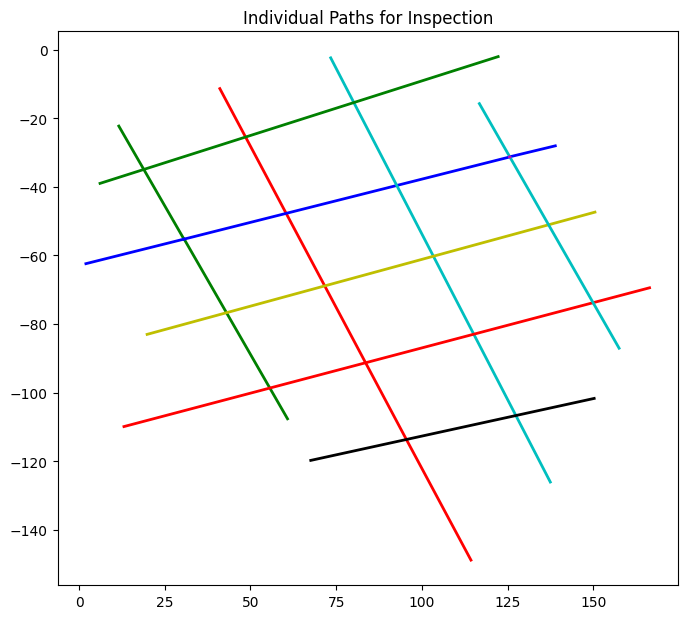

In [ ]:
def plot_individual_shapes(paths_XYs, title):
    fig, ax = plt.subplots(figsize=(8, 8))
    colours = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], -XY[:, 1], c=c, linewidth=2)  # Invert Y-axis for correct orientation
    ax.set_aspect('equal')
    ax.set_title(title)
    plt.show()

plot_individual_shapes(paths_XYs, 'Individual Paths for Inspection')


In [ ]:
def complete_curves(paths_XYs):
    completed_shapes = []
    for shape in paths_XYs:
        completed_shape = []
        for path in shape:
            if not np.allclose(path[0], path[-1]):  # Check if the path is not closed
                path = np.vstack([path, path[0]])  # Close the path by adding the first point to the end
            completed_shape.append(path)
        completed_shapes.append(completed_shape)
    return completed_shapes
def plot_shapes(shapes, title, ax):
    ax.clear()
    ax.set_title(title)

    for shape in shapes:
        for path in shape:
            if path.shape[0] > 1:
                ax.plot(path[:, 0], path[:, 1], marker='o')  # Plot each path with markers
    ax.set_aspect('equal')  # Ensure equal scaling of x and y axes
    ax.grid(True)  # Add grid for better visibility


Read 12 paths from frag2_sol.csv


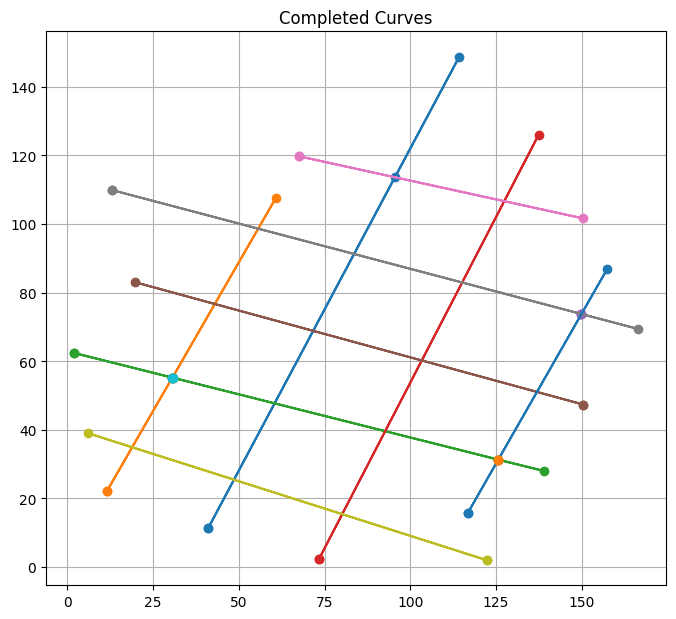

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the paths from the CSV
csv_path = 'frag2_sol.csv'
paths_XYs = read_csv(csv_path)
print(f"Read {len(paths_XYs)} paths from {csv_path}")

# Define complete_curves if not already defined
def complete_curves(paths_XYs):
    completed_shapes = []
    for shape in paths_XYs:
        completed_shape = []
        for path in shape:
            if not np.allclose(path[0], path[-1]):  # Check if the path is not closed
                path = np.vstack([path, path[0]])  # Close the path by adding the first point to the end
            completed_shape.append(path)
        completed_shapes.append(completed_shape)
    return completed_shapes

# Plot completed shapes
def main_complete_and_plot(paths_XYs):
    completed_shapes = complete_curves(paths_XYs)
    fig, ax = plt.subplots(figsize=(8, 8))
    if completed_shapes:
        plot_shapes(completed_shapes, "Completed Curves", ax)
    else:
        ax.text(0.5, 0.5, 'No completed curves detected', horizontalalignment='center', verticalalignment='center', fontsize=12, color='gray')
    plt.title("Completed Curves")
    plt.show()

main_complete_and_plot(paths_XYs)
